In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "4"

import cv2
from PIL import Image
import numpy as np
import random
import tqdm
import json
import matplotlib.pyplot as plt

from visual_tokenizer import get_visual_tokenizer
from utils.visualization import visualize_masks
from data import get_dataset

/home/dchenbs/anaconda3/envs/subobjects_vlm/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# dataset = get_dataset('imagenet', '/share/datasets/imagenet', split='train')
# dataset = get_dataset('coco', '/share/datasets/coco2017', split='train')
dataset = get_dataset('clevr_caption', '/home/dchenbs/workspace/datasets/CLEVR_v1.0', split='train')
# dataset = get_dataset('image_paragraph_captioning', '/home/dchenbs/workspace/datasets/VisualGenome', split='train')

In [4]:
image_resolution = 512
max_tokens = 32

# config = json.load(open('configs/visual_tokenizer/patch_8_per_side_random.json'))
# config = json.load(open('configs/visual_tokenizer/patch_8_per_side_raster.json'))
# config = json.load(open('configs/visual_tokenizer/directsam_0424.json'))
config = json.load(open('configs/visual_tokenizer/directsam_tiny.json'))

visual_tokenizer = get_visual_tokenizer(**config, image_resolution=image_resolution, max_tokens=max_tokens)

### Visualization

/home/dchenbs/anaconda3/envs/subobjects_vlm/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/dchenbs/anaconda3/envs/subobjects_vlm/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


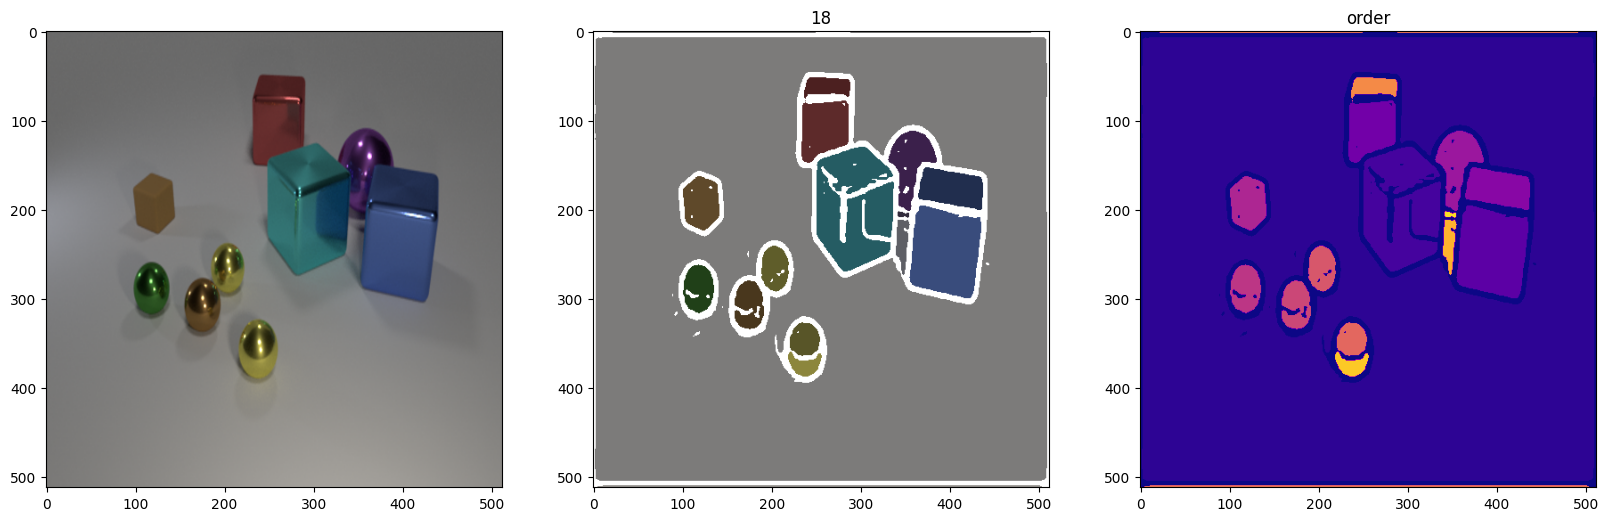

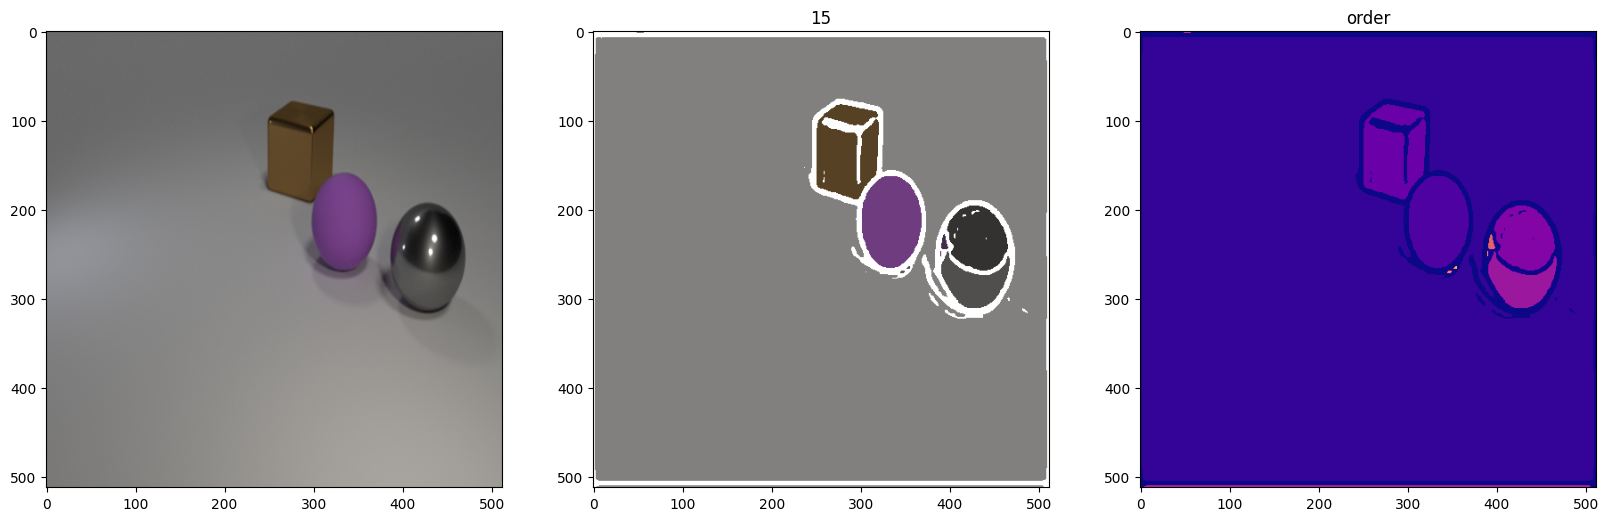

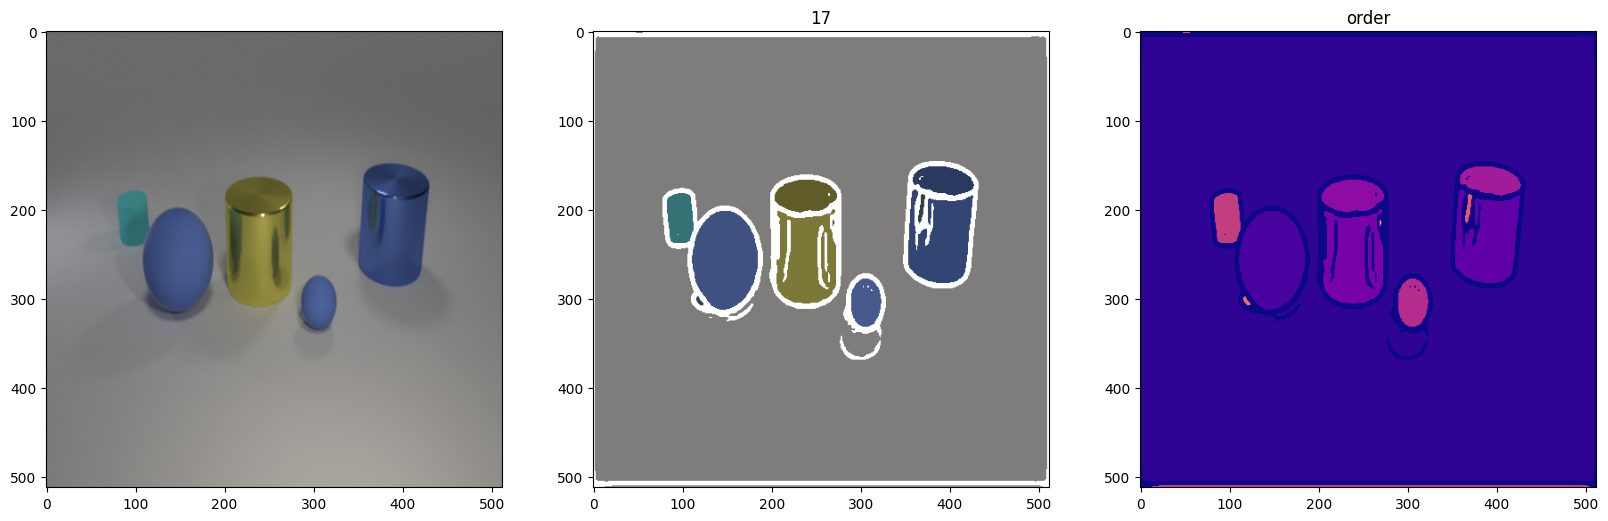

In [5]:
for _ in range(3):
    image = dataset[random.randint(0, len(dataset) - 1)]['image']
    image = image.resize((image_resolution, image_resolution))
    batch_masks = visual_tokenizer(image)

    plt.figure(figsize=(20, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(image)

    plt.subplot(1, 3, 2)
    plt.imshow(visualize_masks(image, batch_masks[0]))
    plt.title((np.sum(batch_masks[0], axis=(1, 2)) > 0).sum())


    labels = np.zeros_like(batch_masks[0][0]).astype(np.int32)
    for i, mask in enumerate(batch_masks[0]):
        if np.sum(mask) == 0:
            continue
        labels += (i + 1) * mask

    plt.subplot(1, 3, 3)
    plt.imshow(labels, cmap='plasma')
    plt.title('order')


    plt.show()

### Statistics and Efficiency

In [6]:
steps = 100
effective_masks = []
for _ in tqdm.tqdm(range(steps)):
    image = dataset[random.randint(0, len(dataset) - 1)]['image']
    image = image.resize((image_resolution, image_resolution))
    masks = visual_tokenizer(image)[0]

    effective_masks.append((np.sum(masks, axis=(1, 2))>0).sum())


100%|██████████| 100/100 [00:03<00:00, 27.85it/s]


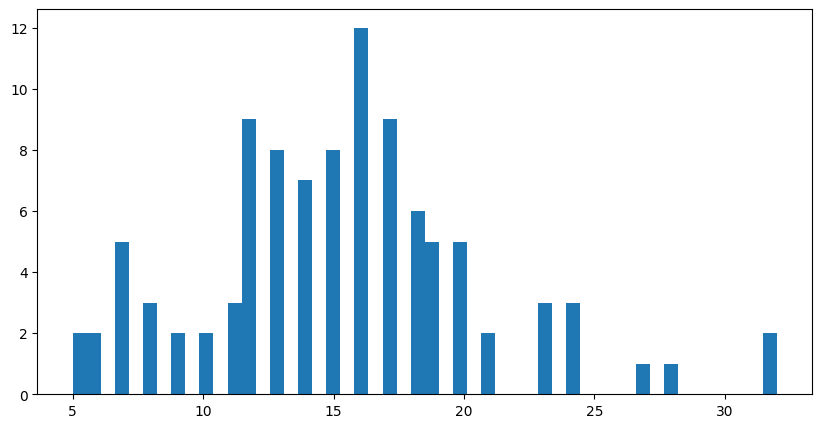

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(effective_masks, bins=50)
plt.show()